In [ ]:
import numpy as np
from math import exp,log
import random
import matplotlib.pyplot as plt

In [ ]:
# X,Y 초기화
# operator dataset 생성
X=np.array([(0,0),(1,0),(0,1),(1,1)]) # 입력 데이터 생성
Y=np.array([0,0,0,1]) #정답 데이터 생성 

In [ ]:
#모델 생성
class logistic_regression_model():
    #w,b 초기화 
    def __init__(self):
        self.w=np.array([random.random(),random.random()])
        self.b=np.array(random.random())
    #0또는 1을 출력하기 위한 시그모이드함수 생성
    def sigmoid(self,z):
        return 1/(1+exp(-z))
    #예측
    def predict(self,x):
        z=self.w[0]*x[0]+self.w[1]*x[1]+self.b
        a=self.sigmoid(z)
        return a

In [ ]:
#learning rate 모델 생성
AND_model_1=logistic_regression_model()
AND_model_2=logistic_regression_model()
AND_model_3=logistic_regression_model()

In [ ]:
#수치 미분을 이용하여 loss function의 최소값을 찾는다 
def train(X,Y,model, lr):
    dw0=0.0
    dw1=0.0
    db=0.0
    m=len(X)
    cost=0.0
    for x,y in zip(X,Y):
        a=model.predict(x)
        if y==1:
            cost-=log(a)
        else:
            cost-=log(1-a)

        dw0+=(a-y)*x[0]
        dw1+=(a-y)*x[1]
        db+=(a-y)
    cost/=m
    model.w[0]-=lr*dw0/m
    model.w[1]-=lr*dw1/m
    model.b-=lr*db/m
    
    return cost

In [ ]:
#loss값을 각 리스트에 추가
AND_loss_1=[]
AND_loss_2=[]
AND_loss_3=[]
for epoch in range(10000):
        #learning rate 0.1
        AND_loss_1.append(train(X,Y,AND_model_1,0.1))
        #learning rate 0.2
        AND_loss_2.append(train(X,Y,AND_model_2,0.2))
        #learning rate 0.01
        AND_loss_3.append(train(X,Y,AND_model_3,0.01))

#plot생성을 위해 epoch 값도 리스트로 정리
epoch = [x for x in range(10000)]
AND_loss_1=np.array(AND_loss_1)
AND_loss_2=np.array(AND_loss_2)
AND_loss_3=np.array(AND_loss_3)

In [ ]:
#learning rate 0.1예측결과
print(AND_model_1.predict((0,0)))
print(AND_model_1.predict((0,1)))
print(AND_model_1.predict((1,0)))
print(AND_model_1.predict((1,1)))

1.260291212752459e-05
0.020320267435816143
0.02032027018567165
0.9715392665474318


In [ ]:
#learning rate 0.2예측결과
print(AND_model_2.predict((0,0)))
print(AND_model_2.predict((0,1)))
print(AND_model_2.predict((1,0)))
print(AND_model_2.predict((1,1)))

1.5113751212027097e-06
0.010139968840429179
0.010139968876148367
0.9858016847061576


In [ ]:
#learning rate 0.01예측결과
print(AND_model_3.predict((0,0)))
print(AND_model_3.predict((0,1)))
print(AND_model_3.predict((1,0)))
print(AND_model_3.predict((1,1)))

0.008488833405931253
0.15061953537680425
0.15008270856090372
0.7852918764151121


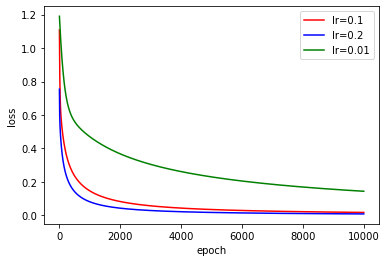

In [ ]:
#loss plot 
plt.plot(epoch,AND_loss_1,'r-',label='lr=0.1')
plt.plot(epoch,AND_loss_2,'b-',label='lr=0.2')
plt.plot(epoch,AND_loss_3,'g-',label='lr=0.01')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()